# **導入需要的套件資料**

In [ ]:
from sklearn. datasets import load_iris
# sklearn 是一種套件：包含統計分析和機器學習建模

from sklearn import neighbors, datasets, preprocessing
#preprocessing(預處理)，將資料及進行編碼的意思
from sklearn.preprocessing import LabelEncoder

# 從sklearn 導入資料拆分的語法
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# **讀取我的資料格式並顯示出來**

In [ ]:
df = pd.read_csv('/content/IRIS.csv')
df_test = pd.read_csv('/content/iris_test.csv')
# 顯示前幾筆的資料，如果沒有特別指定，就是前五筆
df.head()

# 查看資料有沒有空值
# df.isnull()
# # 查看這筆資料的資訊
# df.info

# 查看資料的筆數
# df.shape

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**從我的資料集中，我們可以看到總共有五的欄位，分別代表sepal(萼片)_length, sepal((萼片))_width,petal(花瓣)_length,petal(花瓣)_width與species(種類)**

# **用preprocessing.LabelEncoder()將sepcies進行編碼**

**先將Species進行LabelEncoder編碼**

In [ ]:
labelencoder = LabelEncoder()
df['species'] = labelencoder.fit_transform(df['species'])
# df.head(150)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# **將我的DataFrame 轉為 array格式**

In [ ]:
df_array = df.values
df_array

df_test_array = df_test.values

In [ ]:
x_train = df_array[:,0:4]
y_train = df_array[:,4]


# x_test 用來做測試的
x_test = df_test_array[:,0:4]
# y_test 真實的答案
y_test = df_test_array[:,4]


print('x_train的資料總數',x_train.shape)
print('y_train的資料總數',y_train.shape)
print('x_test的資料總數',x_test.shape)
print('y_test的資料總數',y_test.shape)

x_train的資料總數 (150, 4)
y_train的資料總數 (150,)
x_test的資料總數 (30, 4)
y_test的資料總數 (30,)


In [ ]:
# x 訓練與測試 、 y訓練與測試
# # x_train , x_test, y_train, y_test = train_test_split(x_data, y_label, test_size =0.2,random_state=1)

# **建立 KNN 模型**

In [ ]:
# import the KNeighborsClassifier class from sklearn
# 導入sklearn的neighbors語法， 主要是建立幾個族群
from sklearn.neighbors import KNeighborsClassifier

# 分類的準確率
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
# 建立Knn空的
knn = KNeighborsClassifier()

# 告訴knn我有三個群族
k=3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train , y_train)

y_pred = knn.predict(x_test)

acc_list.append(metrics.accuracy_score(y_test,y_pred))

print('準確度為:{}%'.format(accuracy_score(y_test, y_pred)*100))

準確度為:93.33333333333333%


# **使用Score評估模型**

In [ ]:
print('訓練集:',knn.score(x_train,y_train)*100)
print('測試集:',knn.score(x_test,y_test)*100)

訓練集: 96.0
測試集: 93.33333333333333


# **測試集的正確分類**

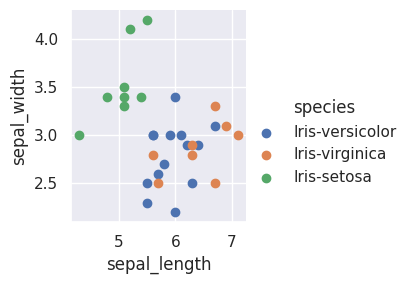

In [ ]:
# plt.figure(figsize =(10,8))

y_test_df = pd.DataFrame(y_test , columns = ['species'])

x_test_df = pd.DataFrame(x_test , columns = ['sepal_length', 'sepal_width',	'petal_length','petal_width'])

x_test_df['species'] = y_test_df['species']

train_plt = sns.FacetGrid(x_test_df,hue='species')
train_plt.map(plt.scatter,"sepal_length","sepal_width")
train_plt.add_legend()

# **KNN (測試集)預測結果**

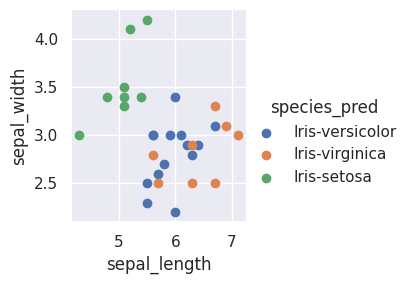

In [ ]:
x_test_df['species_pred'] = y_pred


pred_plt = sns.FacetGrid(x_test_df,hue='species_pred')
pred_plt.map(plt.scatter,"sepal_length","sepal_width")
pred_plt.add_legend()